In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from model.density import OneDDensityModel

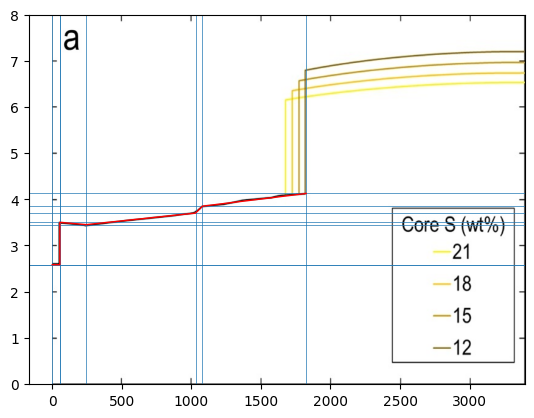

In [2]:
xx = np.array([0, 55, 55.001, 245, 1030, 1080, 1825])
yy = np.array([2582, 2582, 3500, 3450, 3700, 3850, 4125])
total_r = 3390e3

fig, ax = plt.subplots()
brennan_2020 = np.asarray(Image.open("../model/data/brennan_2020.png"))
ax.imshow(brennan_2020, extent=(2, 3395, -0.01, 8), aspect="auto")
for x in xx:
    ax.axvline(x, linewidth=0.5)
for y in yy:
    ax.axhline(y / 1000, linewidth=0.5)
ax.plot(xx, yy / 1000, linewidth=1, color="r")
df = pd.DataFrame(zip(xx, yy), columns=["depth_km", "density"]).set_index("depth_km")

In [3]:
df.to_csv("../model/data/density_brennan_2020.csv")
df

,density
depth_km,
0.000,2582
55.000,2582
55.001,3500
245.000,3450
1030.000,3700
1080.000,3850
1825.000,4125


In [4]:
dm = OneDDensityModel.from_csv("../model/data/density_brennan_2020.csv")
dm.mean_density(55e3, 1825e3, total_r)

3656.513959596753

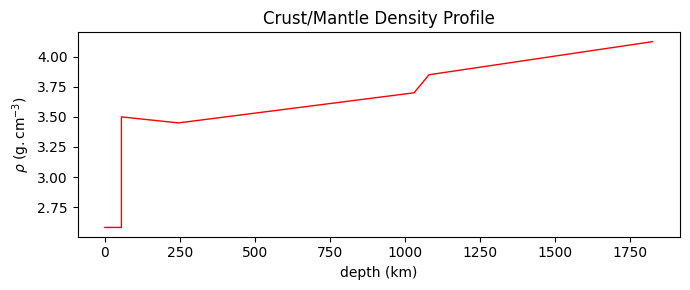

In [5]:
density_fig, density_ax = plt.subplots(1, 1, figsize=(7, 3))
density_ax.plot(xx, yy / 1000, linewidth=1, color="r")
density_ax.set_title("Crust/Mantle Density Profile")
density_ax.set_ylabel("$\\rho$ $(\\mathrm{g.cm}^{-3})$")
density_ax.set_xlabel("depth (km)")
density_fig.tight_layout()
density_fig.savefig("../figures/density_profile.png")